In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import scipy.stats as st
plt.style.use('seaborn')

### Context (From Kaggle):

"*Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided?*"

Content
Globally, World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)

Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)

Gender: The gender of the employee (Male/Female)

Company Type: The type of company where the employee is working (Service/Product)

WFH Setup Available: Is the work from home facility available for the employee (Yes/No)

Designation: The designation of the employee of work in the organization.

In the range of [0.0, 5.0] bigger is higher designation.

Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.

In the range of [1.0, 10.0] (higher means more resource)

Mental Fatigue Score: The level of fatigue mentally the employee is facing.

In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.

Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.

In the range of [0.0, 1.0] where the higher the value is more is the burn out.

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [6]:
df.dropna(subset=['Burn Rate'], inplace=True)

In [7]:
df.fillna(df.median(), inplace=True)

In [8]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [9]:
df = pd.get_dummies(df, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

## EDA - Understanding Correlation

In [10]:
df.head()

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Male,Company Type_Service,WFH Setup Available_Yes
0,fffe32003000360033003200,2008-09-30,2.0,3.0,3.8,0.16,0,1,0
1,fffe3700360033003500,2008-11-30,1.0,2.0,5.0,0.36,1,1,1
2,fffe31003300320037003900,2008-03-10,2.0,4.0,5.8,0.49,0,0,1
3,fffe32003400380032003900,2008-11-03,1.0,1.0,2.6,0.20,1,1,1
4,fffe31003900340031003600,2008-07-24,3.0,7.0,6.9,0.52,0,1,0


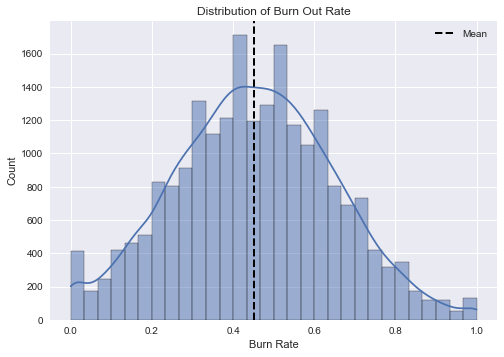

In [11]:
fig, ax = plt.subplots()
sns.histplot(df['Burn Rate'], bins=30, kde=True)
ax.axvline(df['Burn Rate'].mean(), color='k', linestyle='--', label='Mean', linewidth=2)
ax.set_title("Distribution of Burn Out Rate")
ax.legend()

In [12]:
df.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Male,Company Type_Service,WFH Setup Available_Yes
Designation,1.000000,0.851383,0.657882,0.737556,0.111794,0.006597,-0.230274
Resource Allocation,0.851383,1.000000,0.740061,0.829632,0.136407,0.007235,-0.276793
Mental Fatigue Score,0.657882,0.740061,1.000000,0.898926,0.139104,0.002631,-0.263712
Burn Rate,0.737556,0.829632,0.898926,1.000000,0.154895,0.004281,-0.306266
Gender_Male,0.111794,0.136407,0.139104,0.154895,1.000000,-0.011660,-0.073740
Company Type_Service,0.006597,0.007235,0.002631,0.004281,-0.011660,1.000000,0.003410
WFH Setup Available_Yes,-0.230274,-0.276793,-0.263712,-0.306266,-0.073740,0.003410,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

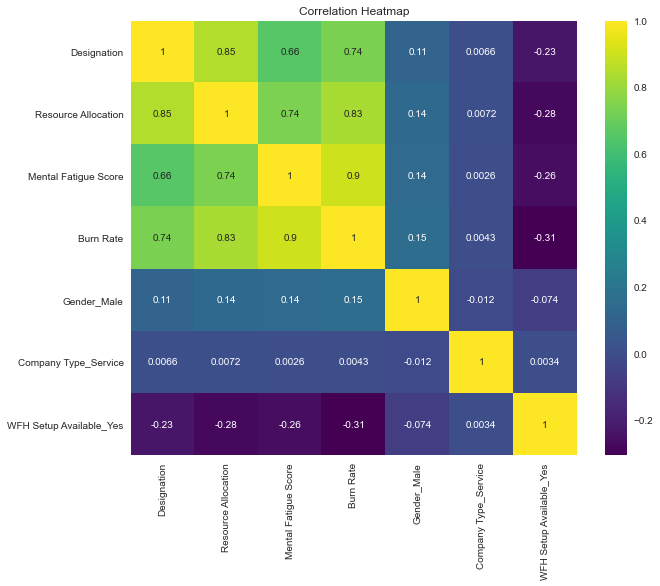

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title("Correlation Heatmap")

The largest correlation to stand out is Burn Rate vs. Mental Fatigue Score

Mean Mental Fatigue: 5.745153981318581
Standard Devation of Mental Fatigue: 1.8330161144164805


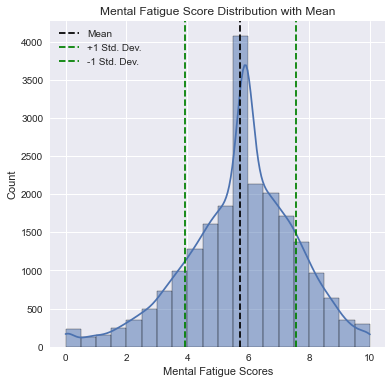

In [14]:
# Store Mean and Std. for easier plotting
plt.figure(figsize=(6,6))
mean = df['Mental Fatigue Score'].mean()
std = df['Mental Fatigue Score'].std()

sns.histplot(df['Mental Fatigue Score'], kde=True, bins=20)
plt.axvline(mean, color='k', linestyle='--',label='Mean')
plt.axvline(mean + std, color='g', linestyle='--', label='+1 Std. Dev.')
plt.axvline(mean - std, color='g', linestyle='--', label='-1 Std. Dev.')
plt.xlabel("Mental Fatigue Scores")
plt.ylabel("Count")
plt.title("Mental Fatigue Score Distribution with Mean")
plt.legend()
print("Mean Mental Fatigue: " + str(mean))
print("Standard Devation of Mental Fatigue: " + str(std))


In [15]:
# Collect sample means from data in great quantity
fatigue_means = []
for i in range(10000):
    temp_mean = np.mean(np.random.choice(df['Mental Fatigue Score'], replace=True, size=1000))
    fatigue_means.append(temp_mean)

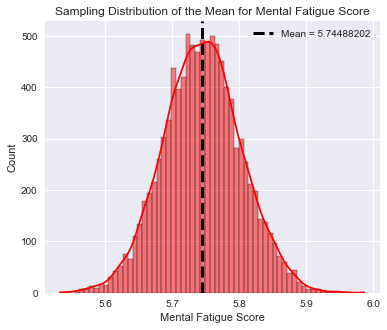

In [16]:
plt.figure(figsize=(6,5))
sns.histplot(fatigue_means, kde=True, color='r')
plt.axvline(np.mean(fatigue_means), color='k', linestyle='--', linewidth=3, label=("Mean = " + str(np.mean(fatigue_means))))
plt.title("Sampling Distribution of the Mean for Mental Fatigue Score")
plt.xlabel("Mental Fatigue Score")
plt.legend()

Text(0.5, 0, 'Gender')

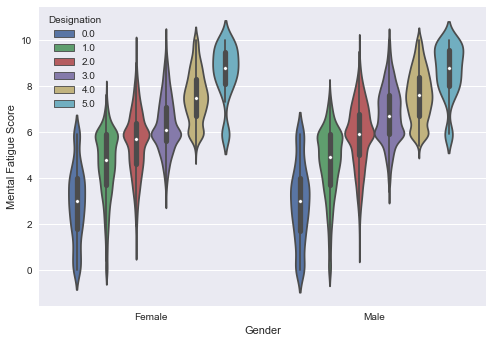

In [17]:
sns.violinplot(x='Gender_Male', y='Mental Fatigue Score', data=df, hue='Designation')
plt.xticks(ticks=[0,1] ,labels=['Female', 'Male'])
plt.xlabel("Gender")

Text(0.5, 0, 'Gender')

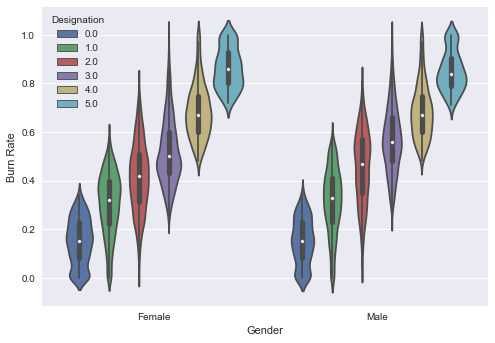

In [18]:
sns.violinplot(x='Gender_Male', y='Burn Rate', data=df, hue='Designation')
plt.xticks(ticks=[0,1] ,labels=['Female', 'Male'])
plt.xlabel("Gender")

For both males and females, it appears that a higher designation increases the mental fatigue score on average. This would make sense as a higher designation would likely entail more responsibility, and mental energy. This also follows with the burn rate by designation, with females experiencing slightly more burn out on average than men.

## Split Data

In [19]:
# Remove Unnecessary Columns:
df.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Burn Rate', axis=1)
y = df['Burn Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
OG_test = pd.read_csv('test.csv')

In [23]:
OG_test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [24]:
OG_test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [25]:
test_set = OG_test.drop(['Employee ID', 'Date of Joining'], axis = 1)

In [26]:
test_set = pd.get_dummies(test_set, drop_first=True)

In [27]:
X_final = test_set

## Model Fitting and Training

In [28]:
def r2_print(true, pred):
    score = r2_score(true, pred)
    print("Model Score: " + str(round(score*100, 4)) + "%")

In [29]:
def fitAndScore(clf):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2_print(y_test, pred)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from lightgbm import LGBMRegressor as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet

## Linear Regression Model

In [31]:
linreg = LinearRegression()
try:
    fitAndScore(linreg)
except Exception:
    print("SVD Did Not Converge")

Model Score: 86.8245%


## Ridge Regression

In [32]:
ridge = Ridge()
fitAndScore(ridge)

Model Score: 86.8245%


## Light Gradient Booster (90.75% Accuracy, Main Model)

Here a pipeline is set up in which the data is scaled and then predictions are made using LGBM

In [33]:
light_gradient = lgb(num_leaves=27)
fitAndScore(light_gradient)

Model Score: 90.7556%


In [34]:
true_pred = light_gradient.predict(X_final)
export_df = OG_test
export_df['Burn Rate'] = true_pred
export_df = export_df[['Employee ID', 'Burn Rate']]
export_df.set_index('Employee ID', inplace=True)
export_df.to_csv("Lgb_Final.csv")

In [35]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

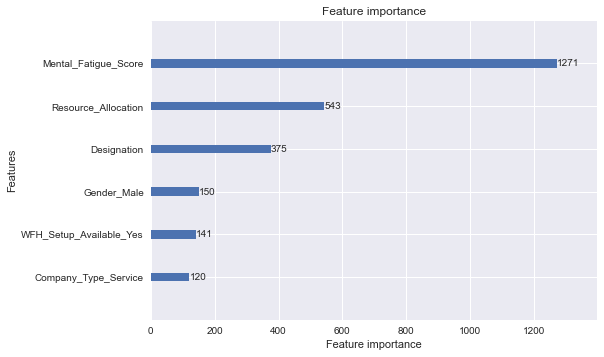

In [36]:
plot_importance(light_gradient)

It's clear that the most important feature utilized is Mental Fatigue Score.

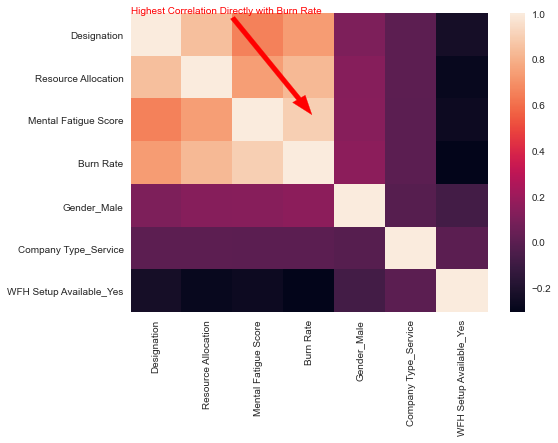

In [37]:
sns.heatmap(df.corr())
plt.annotate("Highest Correlation Directly with Burn Rate", xy=[.01, .002], color = 'r', )
plt.arrow(2, .1, 1.3, 1.9, color='r', width=.1)

In [38]:
from scipy.stats import norm

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
steps = [
    ('scaler', StandardScaler()),
    ('Light Gradient', lgb(num_leaves=27))
]
pipeline = Pipeline(steps)
fitAndScore(pipeline)

Model Score: 90.7556%


## Gradient Boosting Regressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
sklearn_grad = GradientBoostingRegressor()
fitAndScore(sklearn_grad)

Model Score: 90.1928%


## Random Forest Regressor

In [43]:
forest = RandomForestRegressor(n_estimators=31)
fitAndScore(forest)

Model Score: 89.1793%


## SVR

In [44]:
svr = SVR()
fitAndScore(svr)

Model Score: 88.5555%


## ADA Boost Regressor

In [45]:
ada = AdaBoostRegressor()
fitAndScore(ada)

Model Score: 82.8813%


In [46]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

## XGBoost Regressor

This model also did well, but did not outperform

In [47]:
xgb = XGBRegressor(n_estimators=30)
fitAndScore(xgb)

Model Score: 90.6919%


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [49]:
scaler = StandardScaler()
pipeline = make_pipeline(scaler, xgb)

In [50]:
fitAndScore(pipeline)

Model Score: 90.6919%


The model did not perform better when the data was scaled.